## <u>Contents</u>

<div class="alert alert-block alert-info" style="margin-top: 20px">

* [Motivation](#Motivation)
* [Data](#data)


## <u>Motivation</u><a name="Motivation"></a>


<p style='text-align: justify;'> One of the busiest and popular cities in the world is Los Angeles, siutated in California,United States. It is the home of Hollywoodand like New York is one of the most diverse cultural hubs in the world. The city is also known for it's fine food and enormous opportunities it offers. </p>

<p style='text-align: justify;'>However, LA is also one of the most expensive places in the world to live in. As a business opportunity it is relevant to be able to see where Los Angeles's most expensive areas are and if were to place a Greek restaurant, where the prime location would be. </p>
<p> </p>
<div style='text-align: justify;'>The main goal of this project is to identify the restaurant demographics of Los Angeles and compare it with the rental prices around the area. This will give us two possibilities, either we target an expensive neighborhood for a high end Greek Restaurant or a mid-size affordable restaurant in an area where rent is relatively cheaper. The reason I have chosen a Greek is to further introduce the cuisine in the city.</b>. </div>

<p style='text-align: justify;'>Since there are lots of restaurants in LA, neighbourhoods that are <b>not already crowded with restaurants</b> would be shortlisted. The next filter would be neighbourhoods with the <b>least number of Greek restaurants in its vicinity</b>.</p>

## <u>Data</u> <a name="data"></a>

For this project, we will be focusing on the following data factors:
* Number of existing Greek restaurants in the neighbourhood (any type of restaurant) 
* Number of and distance to Greek restaurants in the neighbourhood
* Distance of neighbourhood from city center
* Average neighbourhood rent

The following data sources will be needed to extract/generate the required information: -
* List of all neighbourhoods in LA - https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles
* Coordinates of all neighbourhoods and venues - ***GeoPy Nominatim geocoding***
* Number of restaurants and their type and location in every neighbourhood - ***Foursquare API*** -  https://developer.foursquare.com
* LA rent data - https://www.rentcafe.com/average-rent-market-trends/us/ca/los-angeles/


### Libraries <a name="import"></a>

Importing the required libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas data frame

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
!pip install --upgrade pyOpenSSL

Requirement already up-to-date: pyOpenSSL in /Users/shayanriyaz/opt/anaconda3/lib/python3.7/site-packages (19.1.0)


In [3]:
import re

[Back to top of Analysis](#analysis)

### Web Scraping Neighbourhood Data <a name="scrapenh"></a>

The list of all neighbourhoods in LA is obtained by scraping the relevant webpage.
**https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles** 

**Note: The data in the webpage is in the form of a list and not a table. Therefore, the data is obtained by searching for all list items and then using a particular characteristic that groups the required items.**

In [4]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles').text
soup = BeautifulSoup(url,"html.parser")

In [5]:
lis = []
for li in soup.findAll('li'):
    if li.find(href="/wiki/Portal:Los_Angeles"):
        break
    if li.find(href=re.compile("^/wiki/")):
        lis.append(li)
    if li.text=='Pico Robertson[34]': #Pico Robertson is the only item on the list that does not have a hyperlink reference
        lis.append(li)


[Back to top of Analysis](#analysis)

### Loading and Cleaning Neighbourhood [Data Wrangling] 

In [6]:
neigh = []
for i in range(0,len(lis)):
    neigh.append(lis[i].text.strip())
    
df = pd.DataFrame(neigh)
df.columns = ['Neighbourhood']

In [7]:
df

Neighbourhood
0                            Angelino Heights[TG]
1                                 Arleta[MLA][TG]
2                          Arlington Heights[MLA]
3                                Arts District[1]
4                            Atwater Village[MLA]
5                               Baldwin Hills[TG]
6                     Baldwin Hills/Crenshaw[MLA]
7                             Baldwin Village[TG]
8                                Baldwin Vista[2]
9                             Beachwood Canyon[3]
10   Bel Air, Bel-Air or Bel Air Estates[MLA][TG]
11                             Benedict Canyon[4]
12                             Beverly Crest[MLA]
13                               Beverly Glen[TG]
14                             Beverly Grove[MLA]
15                   Beverly Hills Post Office[5]
16                                Beverly Park[6]
17                               Beverlywood[MLA]
18                         Boyle Heights[MLA][TG]
19                             Brentwood[MLA][TG]
20                            Brentwood Circle[7]
21                              Brentwood Glen[8]
22                       Broadway-Manchester[MLA]
23                                      Brookside
24                                 Bunker Hill[1]
25                              Cahuenga Pass[TG]
26                           Canoga Park[MLA][TG]
27                           Canterbury Knolls[9]
28                                   Carthay[MLA]
29                                 Castle Heights
30                           Central-Alameda[MLA]
31                               Central City[TG]
32                          Century City[MLA][TG]
33                            Chatsworth[MLA][TG]
34                   Chesterfield Square[MLA][TG]
35                         Cheviot Hills[MLA][TG]
36                             Chinatown[MLA][TG]
37                               Civic Center[10]
38                                   Crenshaw[TG]
39                            Crestwood Hills[11]
40                          Cypress Park[MLA][TG]
41                               Del Rey[MLA][TG]
42                                  Downtown[MLA]
43                            Eagle Rock[TG][MLA]
44             East Gate Bel Air[citation needed]
45                            East Hollywood[MLA]
46                             Echo Park[MLA][TG]
47                                   Edendale[12]
48                             El Sereno[MLA][TG]
49                            Elysian Heights[13]
50                              Elysian Park[MLA]
51                            Elysian Valley[MLA]
52                                Encino[MLA][TG]
53                       Exposition Park[MLA][TG]
54                         Faircrest Heights [14]
55                                   Fairfax[MLA]
56                            Fashion District[1]
57                     Filipinotown, Historic[15]
58                          Financial District[1]
59                              Florence[MLA][TG]
60                            Flower District[16]
61                             Franklin Hills[17]
62                                 Gallery Row[1]
63                                   Garvanza[TG]
64                         Glassell Park[MLA][TG]
65                             Gramercy Park[MLA]
66                         Granada Hills[MLA][TG]
67                             Green Meadows[MLA]
68                             Griffith Park[MLA]
69                          Hancock Park[MLA][TG]
70                           Harbor City[MLA][TG]
71                        Harbor Gateway[MLA][TG]
72                       Harvard Heights[MLA][TG]
73                              Harvard Park[MLA]
74                                     Hermon[TG]
75                         Highland Park[MLA][TG]
76                               Historic Core[1]
77                             Hollywood[MLA][TG]
78                             Hollywood Dell[18]
79                       Hollywood H

In [8]:
df['Neighbourhood'] = df.Neighbourhood.str.partition('[')[0] #Removes the citation and reference brackets
df['Neighbourhood'] = df.Neighbourhood.str.partition(',')[0] #Removes the alternatives for 'Bel Air'
df=df[df.Neighbourhood!='Baldwin Hills/Crenshaw'] #Removes redundancy as 'Baldwin Hills' and 'Crenshaw' exist already
df=df[df.Neighbourhood!='Hollywood Hills West'] #Removes redundancy as it has the same coordinates as 'Hollywood Hills'
df=df[df.Neighbourhood!='Brentwood Circle'] #Removes redundancy as it has the same coordinates as 'Brentwood'
df=df[df.Neighbourhood!='Wilshire Park'] #Removes redundancy as it has the same coordinates as 'Wilshire Center'
df.reset_index(inplace=True,drop=True)

### Obtaining Neighbourhood Coordinates  

In [9]:
# define the data frame columns
column_names = ['Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the data frame
nhoods = pd.DataFrame(columns=column_names)

Using GeoPy Nominatim geolocator with the user_agent "la_explorer".

In [10]:
geolocator = Nominatim(user_agent="la_explorer",timeout=5)
for i in range(0,len(df)):
    
    address = df.Neighbourhood[i]+', Los Angeles'
    location = geolocator.geocode(address)
    if location == None:
        latitude = 0
        longitude = 0
    else:
        latitude = location.latitude
        longitude = location.longitude

    nhoods = nhoods.append({'Neighbourhood': df.Neighbourhood[i],
                                              'Latitude': latitude,
                                              'Longitude': longitude}, ignore_index=True)

Clean neighbourhood data with the respective coordinates: 

In [11]:
nhoods

Neighbourhood   Latitude   Longitude
0             Angelino Heights  34.070289 -118.254796
1                       Arleta  34.241327 -118.432205
2            Arlington Heights  34.043494 -118.321374
3                Arts District  34.041239 -118.234450
4              Atwater Village  34.118698 -118.262392
5                Baldwin Hills  34.010989 -118.337071
6              Baldwin Village  34.019456 -118.345910
7                Baldwin Vista   0.000000    0.000000
8             Beachwood Canyon  34.122292 -118.321384
9                      Bel Air  34.098883 -118.459881
10             Benedict Canyon  34.044770 -118.400022
11               Beverly Crest  34.116770 -118.432261
12                Beverly Glen  34.107785 -118.445636
13               Beverly Grove  34.076034 -118.369972
14   Beverly Hills Post Office  34.069650 -118.396306
15                Beverly Park  34.063769 -118.264690
16                 Beverlywood  34.046633 -118.395038
17               Boyle Heights  34.043689 -118.209768
18                   Brentwood  34.052140 -118.474070
19              Brentwood Glen   0.000000    0.000000
20         Broadway-Manchester  33.941015 -118.274404
21                   Brookside  14.587560  121.124733
22                 Bunker Hill  34.055066 -118.251223
23               Cahuenga Pass  34.096867 -118.329508
24                 Canoga Park  34.201078 -118.597826
25           Canterbury Knolls  33.842760 -118.129731
26                     Carthay  34.061121 -118.367300
27              Castle Heights   0.000000    0.000000
28             Central-Alameda  34.004015 -118.247784
29                Central City  34.053691 -118.242767
30                Century City  34.057426 -118.414727
31                  Chatsworth  34.259571 -118.602325
32         Chesterfield Square  33.983474 -118.313651
33               Cheviot Hills  34.040588 -118.409887
34                   Chinatown  34.063840 -118.235868
35                Civic Center  34.057561 -118.246810
36                    Crenshaw  33.925212 -118.326530
37             Crestwood Hills  34.076675 -118.488970
38                Cypress Park  34.092232 -118.224518
39                     Del Rey  33.989653 -118.424344
40                    Downtown  34.042849 -118.247673
41                  Eagle Rock  34.136688 -118.207680
42           East Gate Bel Air   0.000000    0.000000
43              East Hollywood  34.090428 -118.296625
44                   Echo Park  34.077982 -118.256782
45                    Edendale  34.107516 -118.265949
46                   El Sereno  34.081121 -118.177849
47             Elysian Heights  34.099548 -118.244715
48                Elysian Park  34.077434 -118.238620
49              Elysian Valley  34.095913 -118.242033
50                      Encino  34.159132 -118.501617
51             Exposition Park  34.013654 -118.287211
52          Faircrest Heights    0.000000    0.000000
53                     Fairfax  34.079155 -118.352284
54            Fashion District  34.036622 -118.259069
55                Filipinotown   0.000000    0.000000
56          Financial District  34.050248 -118.255775
57                    Florence  33.974159 -118.243286
58             Flower District  34.040964 -118.249397
59              Franklin Hills  14.587560  121.124733
60                 Gallery Row  34.046687 -118.249490
61                    Garvanza  34.119578 -118.180626
62               Glassell Park  34.116120 -118.228963
63               Gramercy Park  33.951194 -118.309327
64               Granada Hills  34.266156 -118.517434
65               Green Meadows  33.940988 -118.262997
66               Griffith Park  34.135814 -118.294789
67                Hancock Park  34.073678 -118.335055
68                 Harbor City  33.797282 -118.300472
69              Harbor Gateway  33.854225 -118.299220
70             Harvard Heights  34.047111 -118.305483
71                Harvard Park  33.983947 -118.304623
72                      Hermon  34.107314 -118.185251
73               High

Deleting neighbourhoods with missing (zero) values and obvious geocoding errors: -


In [12]:

nhoods['Latitude']=nhoods['Latitude'].astype(float)
nhoods['Longitude']=nhoods['Longitude'].astype(float)

nhoods=nhoods[(nhoods.Latitude>33.5) & (nhoods.Latitude<34.4) & (nhoods.Longitude<-118)] 
nhoods.reset_index(inplace=True,drop=True)

Complete neighbourhood data frame: -

In [13]:
nhoods

Neighbourhood   Latitude   Longitude
0             Angelino Heights  34.070289 -118.254796
1                       Arleta  34.241327 -118.432205
2            Arlington Heights  34.043494 -118.321374
3                Arts District  34.041239 -118.234450
4              Atwater Village  34.118698 -118.262392
5                Baldwin Hills  34.010989 -118.337071
6              Baldwin Village  34.019456 -118.345910
7             Beachwood Canyon  34.122292 -118.321384
8                      Bel Air  34.098883 -118.459881
9              Benedict Canyon  34.044770 -118.400022
10               Beverly Crest  34.116770 -118.432261
11                Beverly Glen  34.107785 -118.445636
12               Beverly Grove  34.076034 -118.369972
13   Beverly Hills Post Office  34.069650 -118.396306
14                Beverly Park  34.063769 -118.264690
15                 Beverlywood  34.046633 -118.395038
16               Boyle Heights  34.043689 -118.209768
17                   Brentwood  34.052140 -118.474070
18         Broadway-Manchester  33.941015 -118.274404
19                 Bunker Hill  34.055066 -118.251223
20               Cahuenga Pass  34.096867 -118.329508
21                 Canoga Park  34.201078 -118.597826
22           Canterbury Knolls  33.842760 -118.129731
23                     Carthay  34.061121 -118.367300
24             Central-Alameda  34.004015 -118.247784
25                Central City  34.053691 -118.242767
26                Century City  34.057426 -118.414727
27                  Chatsworth  34.259571 -118.602325
28         Chesterfield Square  33.983474 -118.313651
29               Cheviot Hills  34.040588 -118.409887
30                   Chinatown  34.063840 -118.235868
31                Civic Center  34.057561 -118.246810
32                    Crenshaw  33.925212 -118.326530
33             Crestwood Hills  34.076675 -118.488970
34                Cypress Park  34.092232 -118.224518
35                     Del Rey  33.989653 -118.424344
36                    Downtown  34.042849 -118.247673
37                  Eagle Rock  34.136688 -118.207680
38              East Hollywood  34.090428 -118.296625
39                   Echo Park  34.077982 -118.256782
40                    Edendale  34.107516 -118.265949
41                   El Sereno  34.081121 -118.177849
42             Elysian Heights  34.099548 -118.244715
43                Elysian Park  34.077434 -118.238620
44              Elysian Valley  34.095913 -118.242033
45                      Encino  34.159132 -118.501617
46             Exposition Park  34.013654 -118.287211
47                     Fairfax  34.079155 -118.352284
48            Fashion District  34.036622 -118.259069
49          Financial District  34.050248 -118.255775
50                    Florence  33.974159 -118.243286
51             Flower District  34.040964 -118.249397
52                 Gallery Row  34.046687 -118.249490
53                    Garvanza  34.119578 -118.180626
54               Glassell Park  34.116120 -118.228963
55               Gramercy Park  33.951194 -118.309327
56               Granada Hills  34.266156 -118.517434
57               Green Meadows  33.940988 -118.262997
58               Griffith Park  34.135814 -118.294789
59                Hancock Park  34.073678 -118.335055
60                 Harbor City  33.797282 -118.300472
61              Harbor Gateway  33.854225 -118.299220
62             Harvard Heights  34.047111 -118.305483
63                Harvard Park  33.983947 -118.304623
64                      Hermon  34.107314 -118.185251
65               Highland Park  34.109947 -118.196983
66               Historic Core  34.045962 -118.251874
67                   Hollywood  34.098003 -118.329523
68             Hollywood Hills  34.131179 -118.335547
69                   Hyde Park  33.985402 -118.330861
70              Jefferson Park  34.029617 -118.322460
71            Jewelry District  34.046206 -118.254167
72                   Koreatown  34.061734 -118.305373
73                   

### Los Angeles Neighbourhood Map <a name="lamap"></a>

In [14]:
address = 'Los Angeles, USA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinates of Los Angeles, USA are 34.0536909, -118.2427666.


Creating a map of LA with neighbourhoods superimposed on top: -

In [15]:
# create map of LA using latitude and longitude values
map_la = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(nhoods['Latitude'], nhoods['Longitude'], nhoods['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_la)  
    
map_la

### Defining Foursquare Credentials and Version   <a name="foursquare"></a>

In [1]:
CLIENT_ID = ' ' # Foursquare ID
CLIENT_SECRET = ' ' # Foursquare Secret
VERSION = ' ' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID:  
CLIENT_SECRET:  


### Exploring the first Neighbourhood <a name="first"></a>

In [17]:
neighbourhood_latitude = nhoods.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = nhoods.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = nhoods.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Angelino Heights are 34.0702889, -118.2547965.


In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)

Venue data: -

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e96a0c8aba2971ba520ff72'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'East LA',
  'headerFullLocation': 'East LA, Los Angeles',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 26,
  'suggestedBounds': {'ne': {'lat': 34.074788904500004,
    'lng': -118.24937415757756},
   'sw': {'lat': 34.0657888955, 'lng': -118.26021884242243}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f75a626e5e8f16c87566797',
       'name': 'Halliwell Manor',
       'location': {'address': '1329 Carroll Ave',
        'lat': 34.069328534140894,
        'lng': -118.25416524263122,
        'labeledLatLngs': [{

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Nearby venues of the first neighbourhood: -

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

name             categories  \
0                                 Halliwell Manor  Performing Arts Venue   
1                                        Guisados             Taco Place   
2                                Eightfold Coffee            Coffee Shop   
3                             Subliminal Projects            Art Gallery   
4                           The Park's Finest BBQ              BBQ Joint   
5   Michael Jackson's "Thriller" House (and Tree)          Historic Site   
6                                         Tsubaki    Japanese Restaurant   
7                                           Ototo               Sake Bar   
8                                       Bar Henry           Cocktail Bar   
9                                        K Bakery                 Bakery   
10                                   Bob's Market      Convenience Store   
11                            The Park Restaurant         Breakfast Spot   
12                                       Guisados             Taco Place   
13                                 Domino's Pizza            Pizza Place   
14                                        Super 8                  Motel   
15                                    Knights Inn                  Hotel   
16    Tacos La Movidita (aka Bellevue Steakhouse)             Steakhouse   
17                                   Lento Market                 Market   
18                         Blood is the New Black         Clothing Store   
19                                 Tuesday Bassen               Boutique   
20                                    Marion Park                   Park   
21                                      ESQUELETO          Jewelry Store   
22                                Sunset Sidewalk                  Trail   
23                            Taqueria Los Amigos     Mexican Restaurant   
24                                    Thunderbolt             Restaurant   
25                       Echo Park Baseball Field         Baseball Field   

          lat         lng  
0   34.069329 -118.254165  
1   34.070262 -118.250437  
2   34.071245 -118.250698  
3   34.072290 -118.250737  
4   34.066519 -118.254291  
5   34.069557 -118.254599  
6   34.072938 -118.251298  
7   34.074399 -118.254016  
8   34.069062 -118.250465  
9   34.066124 -118.254059  
10  34.067812 -118.251939  
11  34.074243 -118.252242  
12  34.071178 -118.250273  
13  34.073528 -118.251187  
14  34.072722 -118.250899  
15  34.066201 -118.253954  
16  34.069535 -118.258367  
17  34.070979 -118.250862  
18  34.070938 -118.250793  
19  34.071099 -118.250782  
20  34.067817 -118.251455  
21  34.072412 -118.250786  
22  34.072931 -118.251184  
23  34.073444 -118.251791  
24  34.066298 -118.253917  
25  34.068524 -118.259529

### Exploring all Neighbourhoods  <a name="all"></a>

Function to get the nearby venues of all neighbourhoods and load the data into a data frame: -

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
la_venues = getNearbyVenues(names=nhoods['Neighbourhood'],
                                   latitudes=nhoods['Latitude'],
                                   longitudes=nhoods['Longitude']
                                  )

Data frame of all venues: -

In [24]:
print(la_venues.shape)
la_venues.head()

(3690, 7)


Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  Angelino Heights               34.070289              -118.254796   
1  Angelino Heights               34.070289              -118.254796   
2  Angelino Heights               34.070289              -118.254796   
3  Angelino Heights               34.070289              -118.254796   
4  Angelino Heights               34.070289              -118.254796   

                   Venue  Venue Latitude  Venue Longitude  \
0        Halliwell Manor       34.069329      -118.254165   
1               Guisados       34.070262      -118.250437   
2       Eightfold Coffee       34.071245      -118.250698   
3    Subliminal Projects       34.072290      -118.250737   
4  The Park's Finest BBQ       34.066519      -118.254291   

          Venue Category  
0  Performing Arts Venue  
1             Taco Place  
2            Coffee Shop  
3            Art Gallery  
4              BBQ Joint

In [25]:
la_venues_count=la_venues.groupby('Neighbourhood').count()
la_venues_count.drop(la_venues_count.columns[[0,1,3,4,5]], axis=1,inplace=True)

In [26]:
la_venues_count.reset_index(inplace=True)

It makes sense to set up a restaurant in one of the more popular neighbourhoods so that the restaurant attracts the attention of a lot more people.

Therefore, a list of all the popular neighbourhoods i.e. the neighbourhoods with 10 or more venues is obtained: -

In [27]:
pop_neigh=la_venues_count[(la_venues_count.Venue>=10)]
pop_neigh.reset_index(drop=True,inplace=True)
pop_neigh

Neighbourhood  Venue
0            Angelino Heights     26
1           Arlington Heights     10
2               Arts District     32
3             Atwater Village     44
4               Baldwin Hills     40
5               Beverly Grove     69
6   Beverly Hills Post Office     62
7                Beverly Park     18
8               Boyle Heights     29
9                   Brentwood     22
10                Bunker Hill     77
11              Cahuenga Pass     73
12                Canoga Park     19
13                    Carthay     22
14               Central City     27
15               Century City     80
16                 Chatsworth     15
17                  Chinatown     44
18               Civic Center     39
19                   Crenshaw     19
20                    Del Rey     19
21                   Downtown     45
22                 Eagle Rock     37
23             East Hollywood     17
24                  Echo Park     47
25                   Edendale     13
26               Elysian Park     20
27             Elysian Valley     10
28                     Encino     25
29            Exposition Park     43
30                    Fairfax     31
31         Financial District     70
32                   Florence     18
33            Flower District     51
34                Gallery Row    100
35                   Garvanza     13
36              Glassell Park     14
37              Granada Hills     23
38                Harbor City     12
39             Harbor Gateway     21
40            Harvard Heights     14
41              Highland Park     49
42              Historic Core    100
43                  Hollywood    100
44                  Hyde Park     22
45           Jewelry District    100
46                  Koreatown     65
47                  Larchmont     11
48              Laurel Canyon     26
49               Leimert Park     30
50            Lincoln Heights     15
51             Little Armenia     33
52               Little Tokyo    100
53                  Los Feliz     59
54                  Mar Vista     23
55               Mid-Wilshire     28
56              Mission Hills     30
57            North Hollywood     19
58                 Northridge     46
59          Pacific Palisades     50
60                      Palms     34
61              Panorama City     30
62               Park La Brea     12
63                 Pico-Union     20
64                Playa Vista     30
65              Playa del Rey     10
66                     Reseda     19
67                  San Pedro     36
68                   Sawtelle     28
69               Sherman Oaks     82
70                Silver Lake     14
71                   Skid Row     14
72            Sunset Junction     41
73                    Tarzana     40
74                  Thai Town     39
75                Toluca Lake     27
76               Toy District    100
77                    Tujunga     13
78            University Park     44
79                Valley Glen     11
80             Valley Village     18
81                   Van Nuys     25
82                     Venice     35
83             Victor Heights     23
84              Victoria Park     29
85              Village Green     15
86              Warner Center     12
87                      Watts     10
88           West Los Angeles     32
89                Westchester     22
90                   Westdale     21
91                   Westlake     14
92                   Westwood     17
93           Westwood Village     66
94            Whitley Heights     36
95         Wholesale District     32
96                 Wilmington     15
97            Wilshire Center     10
98                   Winnetka     13
99             Woodland Hills     57

Updating the venues data frame to include only the venues which are in popular neighbourhoods: -

In [28]:
pop_list=pop_neigh['Neighbourhood'].values.tolist()

for i in range(0,len(la_venues)):

    if la_venues.iloc[i,0] not in pop_list:
        la_venues.iloc[i,0]='TO DROP'

la_venues=la_venues[la_venues.Neighbourhood!='TO DROP']
la_venues.reset_index(drop=True,inplace=True)

In [29]:
la_venues

Neighbourhood  Neighbourhood Latitude  \
0              Angelino Heights               34.070289   
1              Angelino Heights               34.070289   
2              Angelino Heights               34.070289   
3              Angelino Heights               34.070289   
4              Angelino Heights               34.070289   
5              Angelino Heights               34.070289   
6              Angelino Heights               34.070289   
7              Angelino Heights               34.070289   
8              Angelino Heights               34.070289   
9              Angelino Heights               34.070289   
10             Angelino Heights               34.070289   
11             Angelino Heights               34.070289   
12             Angelino Heights               34.070289   
13             Angelino Heights               34.070289   
14             Angelino Heights               34.070289   
15             Angelino Heights               34.070289   
16             Angelino Heights               34.070289   
17             Angelino Heights               34.070289   
18             Angelino Heights               34.070289   
19             Angelino Heights               34.070289   
20             Angelino Heights               34.070289   
21             Angelino Heights               34.070289   
22             Angelino Heights               34.070289   
23             Angelino Heights               34.070289   
24             Angelino Heights               34.070289   
25             Angelino Heights               34.070289   
26            Arlington Heights               34.043494   
27            Arlington Heights               34.043494   
28            Arlington Heights               34.043494   
29            Arlington Heights               34.043494   
30            Arlington Heights               34.043494   
31            Arlington Heights               34.043494   
32            Arlington Heights               34.043494   
33            Arlington Heights               34.043494   
34            Arlington Heights               34.043494   
35            Arlington Heights               34.043494   
36                Arts District               34.041239   
37                Arts District               34.041239   
38                Arts District               34.041239   
39                Arts District               34.041239   
40                Arts District               34.041239   
41                Arts District               34.041239   
42                Arts District               34.041239   
43                Arts District               34.041239   
44                Arts District               34.041239   
45                Arts District               34.041239   
46                Arts District               34.041239   
47                Arts District               34.041239   
48                Arts District               34.041239   
49                Arts District               34.041239   
50                Arts District               34.041239   
51                Arts District               34.041239   
52                Arts District               34.041239   
53                Arts District               34.041239   
54                Arts District               34.041239   
55                Arts District               34.041239   
56                Arts District               34.041239   
57                Arts District               34.041239   
58                Arts District               34.041239   
59                Arts District               34.041239   
60                Arts District               34.041239   
61                Arts District               34.041239   
62                Arts District               34.041239   
63                Arts District               34.041239   
64                Arts District               34.041239   
65                Arts District               34.041239   
66                Arts District               34.041239   
67    

In [30]:
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))

There are 306 uniques categories.


### Analyzing each Neighbourhood  <a name="analyze"></a>

In [31]:
# one hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to data frame
la_onehot['Neighbourhood'] = la_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

Neighbourhood  ATM  Accessories Store  Adult Boutique  Airport Terminal  \
0  Angelino Heights    0                  0               0                 0   
1  Angelino Heights    0                  0               0                 0   
2  Angelino Heights    0                  0               0                 0   
3  Angelino Heights    0                  0               0                 0   
4  Angelino Heights    0                  0               0                 0   

   American Restaurant  Amphitheater  Aquarium  Arcade  \
0                    0             0         0       0   
1                    0             0         0       0   
2                    0             0         0       0   
3                    0             0         0       0   
4                    0             0         0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            1           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Astrologer  Athletics & Sports  Auto Garage  \
0                 0           0                   0            0   
1                 0           0                   0            0   
2                 0           0                   0            0   
3                 0           0                   0            0   
4                 0           0                   0            0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          1           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0     0    0               0                 0                 0   
1     0    0               0                 0                 0   
2     0    0               0                 0                 0   
3     0    0               0                 0                 0   
4     0    0               0                 0                 0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0                0         0            0           0              0   
1                0         0            0           0              0   
2                0         0            0           0              0   
3                0         0            0           0              0   
4                0         0            0           0              0   

   Bike Rental / Bike Share  Board Shop  Bookstore  Boutique  Bowling Alley  \
0                         0           0          0         0              0   
1                         0           0          0         0              0   
2                         0           0          0         0              0   
3                         0           0          0         0              0   
4                         0           0          0         0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0                0       0         0      

Grouping rows by neighbourhood by taking the mean of the frequency of occurrence of each category: -

In [32]:
la_grouped = la_onehot.groupby('Neighbourhood').mean().reset_index()
la_grouped

Neighbourhood       ATM  Accessories Store  Adult Boutique  \
0            Angelino Heights  0.000000           0.000000        0.000000   
1           Arlington Heights  0.000000           0.000000        0.000000   
2               Arts District  0.000000           0.000000        0.000000   
3             Atwater Village  0.000000           0.000000        0.000000   
4               Baldwin Hills  0.000000           0.025000        0.000000   
5               Beverly Grove  0.000000           0.014493        0.000000   
6   Beverly Hills Post Office  0.016129           0.000000        0.000000   
7                Beverly Park  0.000000           0.000000        0.000000   
8               Boyle Heights  0.034483           0.000000        0.000000   
9                   Brentwood  0.000000           0.000000        0.000000   
10                Bunker Hill  0.000000           0.000000        0.000000   
11              Cahuenga Pass  0.000000           0.000000        0.000000   
12                Canoga Park  0.000000           0.000000        0.000000   
13                    Carthay  0.000000           0.000000        0.000000   
14               Central City  0.000000           0.000000        0.000000   
15               Century City  0.000000           0.000000        0.000000   
16                 Chatsworth  0.000000           0.000000        0.000000   
17                  Chinatown  0.000000           0.000000        0.000000   
18               Civic Center  0.000000           0.000000        0.000000   
19                   Crenshaw  0.000000           0.000000        0.000000   
20                    Del Rey  0.000000           0.000000        0.000000   
21                   Downtown  0.000000           0.000000        0.000000   
22                 Eagle Rock  0.000000           0.000000        0.000000   
23             East Hollywood  0.000000           0.000000        0.000000   
24                  Echo Park  0.000000           0.000000        0.000000   
25                   Edendale  0.000000           0.000000        0.000000   
26               Elysian Park  0.000000           0.000000        0.000000   
27             Elysian Valley  0.000000           0.000000        0.000000   
28                     Encino  0.040000           0.000000        0.000000   
29            Exposition Park  0.000000           0.000000        0.000000   
30                    Fairfax  0.000000           0.000000        0.000000   
31         Financial District  0.000000           0.000000        0.000000   
32                   Florence  0.000000           0.000000        0.000000   
33            Flower District  0.000000           0.000000        0.000000   
34                Gallery Row  0.000000           0.000000        0.000000   
35                   Garvanza  0.000000           0.000000        0.000000   
36              Glassell Park  0.000000           0.000000        0.000000   
37              Granada Hills  0.000000           0.000000        0.000000   
38                Harbor City  0.000000           0.000000        0.000000   
39             Harbor Gateway  0.000000           0.000000        0.000000   
40            Harvard Heights  0.000000           0.000000        0.000000   
41              Highland Park  0.000000           0.000000        0.000000   
42              Historic Core  0.000000           0.000000        0.000000   
43                  Hollywood  0.000000           0.000000        0.000000   
44                  Hyde Park  0.045455           0.000000        0.000000   
45           Jewelry District  0.000000           0.000000        0.000000   
46                  Koreatown  0.000000           0.000000        0.000000   
47                  Larchmont  0.000000           0.000000        0.000000   
48              Laurel Canyon  0.000000           0.000000        0.000000   
49               Leimert Park  0.000000           0.000000        0.000000   
50            Lincoln Heights  0.00000

Printing each neighbourhood along with the top 5 most common venues: -

In [33]:
num_top_venues = 5

for hood in la_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = la_grouped[la_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['VENUE','FREQ']
    temp = temp.iloc[1:]
    temp['FREQ'] = temp['FREQ'].astype(float)
    temp = temp.round({'FREQ': 2})
    print(temp.sort_values('FREQ', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Angelino Heights----
            VENUE  FREQ
0      Taco Place  0.08
1   Jewelry Store  0.04
2          Market  0.04
3           Trail  0.04
4  Baseball Field  0.04


----Arlington Heights----
                       VENUE  FREQ
0                 Restaurant   0.1
1  Latin American Restaurant   0.1
2                       Café   0.1
3                       Food   0.1
4              Grocery Store   0.1


----Arts District----
                VENUE  FREQ
0         Coffee Shop  0.09
1  Italian Restaurant  0.09
2         Art Gallery  0.09
3         Event Space  0.06
4          Food Truck  0.03


----Atwater Village----
                   VENUE  FREQ
0            Coffee Shop  0.05
1             Restaurant  0.05
2  Vietnamese Restaurant  0.05
3            Pizza Place  0.05
4           Liquor Store  0.05


----Baldwin Hills----
                  VENUE  FREQ
0  Fast Food Restaurant  0.08
1        Lingerie Store  0.05
2    Mexican Restaurant  0.05
3        Sandwich Place  0.05
4      Departme

Creating a new data frame and displaying the top 12 venues for each neighbourhood: -

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [79]:
num_top_venues = 12

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new data frame
Neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhoods_venues_sorted['Neighbourhood'] = la_grouped['Neighbourhood']

for ind in np.arange(la_grouped.shape[0]):
    Neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

Neighbourhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue      2nd Most Common Venue  \
0   Angelino Heights            Taco Place                      Hotel   
1  Arlington Heights        Shop & Service  Latin American Restaurant   
2      Arts District           Art Gallery                Coffee Shop   
3    Atwater Village            Restaurant                Coffee Shop   
4      Baldwin Hills  Fast Food Restaurant         Mexican Restaurant   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0                  Park     Mexican Restaurant        Breakfast Spot   
1   Rental Car Location          Grocery Store            Restaurant   
2    Italian Restaurant            Event Space           Pop-Up Shop   
3          Liquor Store  Vietnamese Restaurant           Pizza Place   
4        Lingerie Store         Sandwich Place      Department Store   

             6th Most Common Venue 7th Most Common Venue  \
0                         Boutique            Steakhouse   
1                             Food     Convenience Store   
2                        Gun Range          Cocktail Bar   
3                   Cosmetics Shop             Nightclub   
4  Southern / Soul Food Restaurant       Supplement Shop   

  8th Most Common Venue 9th Most Common Venue    10th Most Common Venue  \
0                Market        Clothing Store              Cocktail Bar   
1           Art Gallery           Pizza Place                      Café   
2           Beer Garden        Clothing Store  Mediterranean Restaurant   
3            Donut Shop            Taco Place            Sandwich Place   
4    Frozen Yogurt Shop   Fried Chicken Joint            Breakfast Spot   

  11th Most Common Venue 12th Most Common Venue  
0            Coffee Shop         Baseball Field  
1   Ethiopian Restaurant            Event Space  
2   Gym / Fitness Center           Climbing Gym  
3              Bookstore               Boutique  
4      Mobile Phone Shop          Shopping Mall

### Clustering Neighbourhoods  <a name="cluster"></a>

The first step is to determine the optimal value of K for the dataset using the **Silhouette Coefficient Method.**

A higher Silhouette Coefficient score relates to a model with better defined clusters.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters.

In [80]:
from sklearn.metrics import silhouette_score

la_grouped_clustering = la_grouped.drop('Neighbourhood', 1)

for n_cluster in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster).fit(la_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(la_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3040715485873642
For n_clusters=3, The Silhouette Coefficient is 0.06532647417266804
For n_clusters=4, The Silhouette Coefficient is 0.10042004235046564
For n_clusters=5, The Silhouette Coefficient is 0.04794401316194181
For n_clusters=6, The Silhouette Coefficient is 0.03610287993982029
For n_clusters=7, The Silhouette Coefficient is 0.029292954418456838
For n_clusters=8, The Silhouette Coefficient is 0.06277062384395239
For n_clusters=9, The Silhouette Coefficient is 0.07237498278975985
For n_clusters=10, The Silhouette Coefficient is 0.05968495625579318
For n_clusters=11, The Silhouette Coefficient is 0.03834241038710243


The Silhouette Coefficient is the highest for n_clusters=4. Therefore, the neighbourhoods shall be grouped into 4 clusters (k=4) using ***k*-means clustering.**

In [81]:
# set number of clusters
kclusters = 4

la_grouped_clustering = la_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the data frame
kmeans.labels_

array([0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 0,
       3, 0, 1, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0], dtype=int32)

Creating a new data frame that includes the cluster as well as the top 10 venues for each neighbourhood: -

In [82]:
# add clustering labels
Neighbourhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_.astype(int))
# Neighbourhoods_venues_sorted['Cluster Label']=kmeans.labels_.astype(int)
la_merged = nhoods

# merge la_grouped with nhoods to add latitude/longitude for each Neighbourhood
la_merged = la_merged.join(Neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
la_merged.dropna(inplace=True)
la_merged['Cluster Label'] = la_merged['Cluster Label'].astype(int)
la_merged.head() 

Neighbourhood   Latitude   Longitude  Cluster Label  \
0   Angelino Heights  34.070289 -118.254796              0   
2  Arlington Heights  34.043494 -118.321374              0   
3      Arts District  34.041239 -118.234450              0   
4    Atwater Village  34.118698 -118.262392              0   
5      Baldwin Hills  34.010989 -118.337071              3   

  1st Most Common Venue      2nd Most Common Venue 3rd Most Common Venue  \
0            Taco Place                      Hotel                  Park   
2        Shop & Service  Latin American Restaurant   Rental Car Location   
3           Art Gallery                Coffee Shop    Italian Restaurant   
4            Restaurant                Coffee Shop          Liquor Store   
5  Fast Food Restaurant         Mexican Restaurant        Lingerie Store   

   4th Most Common Venue 5th Most Common Venue  \
0     Mexican Restaurant        Breakfast Spot   
2          Grocery Store            Restaurant   
3            Event Space           Pop-Up Shop   
4  Vietnamese Restaurant           Pizza Place   
5         Sandwich Place      Department Store   

             6th Most Common Venue 7th Most Common Venue  \
0                         Boutique            Steakhouse   
2                             Food     Convenience Store   
3                        Gun Range          Cocktail Bar   
4                   Cosmetics Shop             Nightclub   
5  Southern / Soul Food Restaurant       Supplement Shop   

  8th Most Common Venue 9th Most Common Venue    10th Most Common Venue  \
0                Market        Clothing Store              Cocktail Bar   
2           Art Gallery           Pizza Place                      Café   
3           Beer Garden        Clothing Store  Mediterranean Restaurant   
4            Donut Shop            Taco Place            Sandwich Place   
5    Frozen Yogurt Shop   Fried Chicken Joint            Breakfast Spot   

  11th Most Common Venue 12th Most Common Venue  
0            Coffee Shop         Baseball Field  
2   Ethiopian Restaurant            Event Space  
3   Gym / Fitness Center           Climbing Gym  
4              Bookstore               Boutique  
5      Mobile Phone Shop          Shopping Mall

Visualizing the resulting neighbourhood clusters on the map: -

In [84]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[2]='#006000'
rainbow[1]='#006ff6'
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Latitude'], la_merged['Longitude'], la_merged['Neighbourhood'], la_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 100px; left: 50px; width: 120px; height: 100px; 
                            border:3px solid black; z-index:9999; font-size:13px;
                            ">&nbsp; Green - Cluster 0 <br>
                              &nbsp; Red - Cluster 1 <br>
                              &nbsp; Purple - Cluster 2 <br>
                              &nbsp; Blue - Cluster 3 </i>
                </div>
                ''' 

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

[Back to top of Analysis](#analysis)

### Examining the Clusters  <a name="examine"></a>

Creating a data frame for each cluster that includes the top 12 venues for each of its neighbourhoods: -

In [85]:
la_merged.loc[la_merged['Cluster Label'] == 0, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood      1st Most Common Venue  \
0             Angelino Heights                 Taco Place   
2            Arlington Heights             Shop & Service   
3                Arts District                Art Gallery   
4              Atwater Village                 Restaurant   
12               Beverly Grove          French Restaurant   
13   Beverly Hills Post Office                      Hotel   
14                Beverly Park                       Park   
17                   Brentwood             Clothing Store   
19                 Bunker Hill             Sandwich Place   
20               Cahuenga Pass                     Lounge   
21                 Canoga Park        Rental Car Location   
25                Central City                     Museum   
26                Century City                Coffee Shop   
27                  Chatsworth         Mexican Restaurant   
30                   Chinatown         Chinese Restaurant   
31                Civic Center                    Theater   
35                     Del Rey         Mexican Restaurant   
36                    Downtown                        Bar   
37                  Eagle Rock          French Restaurant   
38              East Hollywood                     Bakery   
39                   Echo Park                        Bar   
40                    Edendale                Yoga Studio   
43                Elysian Park           Baseball Stadium   
44              Elysian Valley                      Trail   
45                      Encino        Japanese Restaurant   
46             Exposition Park             History Museum   
47                     Fairfax         Mexican Restaurant   
49          Financial District    New American Restaurant   
51             Flower District        Arts & Crafts Store   
52                 Gallery Row                        Bar   
53                    Garvanza         Chinese Restaurant   
56               Granada Hills                 Food Truck   
60                 Harbor City                       Food   
65               Highland Park         Mexican Restaurant   
66               Historic Core                        Bar   
67                   Hollywood                     Lounge   
71            Jewelry District                Coffee Shop   
76                   Larchmont                 Food Truck   
77               Laurel Canyon         Mexican Restaurant   
81                Little Tokyo        Japanese Restaurant   
82                   Los Feliz                Coffee Shop   
85                   Mar Vista                     Market   
87                Mid-Wilshire     Furniture / Home Store   
88               Mission Hills            Thai Restaurant   
94             North Hollywood        American Restaurant   
95                  Northridge         Mexican Restaurant   
96           Pacific Palisades             Ice Cream Shop   
98                       Palms                       Café   
100               Park La Brea                 Art Museum   
101                 Pico-Union  Latin American Restaurant   
103                Playa Vista       Gym / Fitness Center   
106                     Reseda      Vietnamese Restaurant   
109                   Sawtelle       Gym / Fitness Center   
111               Sherman Oaks           Sushi Restaurant   
112                Silver Lake             Ice Cream Shop   
113                   Skid Row                        Bar   
118            Sunset Junction                Coffee Shop   
121                    Tarzana           Sushi Restaurant   
124                Toluca Lake             Breakfast Spot   
125               Toy District                        Bar   
126                    Tujunga         Mexican Restaurant   
128            University Park             Shipping Store   
129            University Park             Shipping Store   
130                Valley Glen                   Tiki Bar   
131             Valley Village             Cosmetics

In [86]:
la_merged.loc[la_merged['Cluster Label'] == 1, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood 1st Most Common Venue   2nd Most Common Venue  \
62  Harvard Heights     Korean Restaurant  Thrift / Vintage Store   
72        Koreatown     Korean Restaurant                    Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
62         Grocery Store    Mexican Restaurant  Fast Food Restaurant   
72        Ice Cream Shop   Japanese Restaurant          Dessert Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
62   Japanese Restaurant        Discount Store                  Café   
72                 Hotel  Brazilian Restaurant                Bakery   

   9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
62           Gas Station            Pizza Place            Fabric Shop   
72       Bubble Tea Shop             Restaurant            Coffee Shop   

   12th Most Common Venue  
62     Falafel Restaurant  
72              BBQ Joint

In [87]:
la_merged.loc[la_merged['Cluster Label'] == 2, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood 1st Most Common Venue      2nd Most Common Venue  \
80   Little Armenia       Thai Restaurant  Middle Eastern Restaurant   
123       Thai Town       Thai Restaurant                       Café   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
80         Massage Studio                  Café            Strip Club   
123        Massage Studio        Sandwich Place             Juice Bar   

    6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
80            Comedy Club         Mexican Restaurant  Gym / Fitness Center   
123             Pet Store  Middle Eastern Restaurant  Fast Food Restaurant   

    9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
80   Marijuana Dispensary       Sushi Restaurant              Juice Bar   
123            Strip Club   Marijuana Dispensary        Supplement Shop   

    12th Most Common Venue  
80               Pet Store  
123       Sushi Restaurant

In [88]:
la_merged.loc[la_merged['Cluster Label'] == 3, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
5      Baldwin Hills  Fast Food Restaurant    Mexican Restaurant   
16     Boyle Heights         Grocery Store    Mexican Restaurant   
23           Carthay                 Hotel      Sushi Restaurant   
32          Crenshaw             Pet Store      Airport Terminal   
50          Florence          Burger Joint    Mexican Restaurant   
54     Glassell Park           Pizza Place  Fast Food Restaurant   
61    Harbor Gateway  Fast Food Restaurant          Burger Joint   
69         Hyde Park   Fried Chicken Joint                   ATM   
78      Leimert Park  Fast Food Restaurant                  Park   
79   Lincoln Heights  Fast Food Restaurant    Mexican Restaurant   
99     Panorama City     Mobile Phone Shop            Shoe Store   
102    Playa del Rey          Liquor Store        Shipping Store   
108        San Pedro           Coffee Shop           Pizza Place   
132         Van Nuys        Sandwich Place    Mexican Restaurant   
140    Village Green    Chinese Restaurant              Pharmacy   
142            Watts  Fast Food Restaurant         Women's Store   
144      Westchester           Pizza Place           Coffee Shop   
145         Westdale                  Park        Breakfast Spot   
147         Westlake            Donut Shop  Fast Food Restaurant   
153       Wilmington          Burger Joint        Sandwich Place   
156         Winnetka           Video Store  Fast Food Restaurant   

         3rd Most Common Venue          4th Most Common Venue  \
5               Lingerie Store                 Sandwich Place   
16        Fast Food Restaurant                       Pharmacy   
23        Fast Food Restaurant                           Bank   
32                      Tunnel                     Restaurant   
50              Ice Cream Shop                 Sandwich Place   
54              Shipping Store                         Bakery   
61                Noodle House  Paper / Office Supplies Store   
69                   BBQ Joint                    Pizza Place   
78         American Restaurant                           Bank   
79           Convenience Store                     Food Truck   
99            Asian Restaurant             Mexican Restaurant   
102       Gym / Fitness Center                    Flower Shop   
108                        ATM             Mexican Restaurant   
132          Convenience Store             Chinese Restaurant   
140        American Restaurant              Mobile Phone Shop   
142              Grocery Store            Fried Chicken Joint   
144                       Bank                      Pet Store   
145                 Donut Shop                   Burger Joint   
147             Clothing Store                Thai Restaurant   
153                Video Store                     Donut Shop   
156  Latin American Restaurant                    Pizza Place   

       5th Most Common Venue            6th Most Common Venue  \
5           Department Store  Southern / Soul Food Restaurant   
16                Restaurant                             Bank   
23            Sandwich Place                      Coffee Shop   
32            Hardware Store             Fast Food Restaurant   
50   Fruit & Vegetable Store                       Shoe Store   
54      Other Great Outdoors                    Grocery Store   
61             Big Box Store                 Sushi Restaurant   
69            Sandwich Place                         Pharmacy   
78               Pizza Place  Southern / Soul Food Restaurant   
79               Video Store                      Music Venue   
99            Sandwich Place              Filipino Restaurant   
102          Automotive Shop                       Laundromat   
108             Burger Joint               Italian Restaurant   
132           Shipping Store                  Automotive Shop   
140                     Bank                             Café   
142                 Pharmacy           

Creating a data frame grouped by clusters by taking the mean of the frequency of occurrence of each venue category: -

In [89]:
la_results = pd.DataFrame(kmeans.cluster_centers_)
la_results.columns = la_grouped_clustering.columns
la_results.index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3']
la_results['Total Sum'] = la_results.sum(axis = 1)
la_results

ATM  Accessories Store  Adult Boutique  Airport Terminal  \
Cluster 0  0.001824           0.000193    4.878049e-04     -6.505213e-19   
Cluster 1  0.000000           0.000000    0.000000e+00      0.000000e+00   
Cluster 2  0.000000           0.000000    0.000000e+00      0.000000e+00   
Cluster 3  0.008357           0.001190   -1.084202e-19      5.012531e-03   

           American Restaurant  Amphitheater      Aquarium        Arcade  \
Cluster 0             0.016911  9.767442e-04  6.201550e-04  7.721254e-04   
Cluster 1             0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
Cluster 2             0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
Cluster 3             0.014195  2.168404e-19  1.626303e-19 -1.084202e-19   

           Argentinian Restaurant  Art Gallery    Art Museum  \
Cluster 0            4.938272e-04     0.011801  3.194111e-03   
Cluster 1            0.000000e+00     0.000000  0.000000e+00   
Cluster 2            0.000000e+00     0.000000  0.000000e+00   
Cluster 3           -1.626303e-19     0.001587  8.673617e-19   

           Arts & Crafts Store  Asian Restaurant    Astrologer  \
Cluster 0         7.225710e-03          0.009471  3.252033e-04   
Cluster 1         0.000000e+00          0.000000  0.000000e+00   
Cluster 2         0.000000e+00          0.000000  0.000000e+00   
Cluster 3         1.734723e-18          0.007607 -1.355253e-19   

           Athletics & Sports  Auto Garage  Auto Workshop  Automotive Shop  \
Cluster 0            0.001813     0.001026  -5.421011e-19     1.301043e-18   
Cluster 1            0.000000     0.000000   0.000000e+00     0.000000e+00   
Cluster 2            0.000000     0.000000   0.000000e+00     0.000000e+00   
Cluster 3            0.000000     0.001587   2.267574e-03     6.666667e-03   

           BBQ Joint  Baby Store    Bagel Shop    Bakery      Bank       Bar  \
Cluster 0   0.002748    0.000476  8.971045e-04  0.014767  0.006011  0.018809   
Cluster 1   0.015385    0.000000  0.000000e+00  0.015385  0.000000  0.007692   
Cluster 2   0.000000    0.000000  0.000000e+00  0.000000  0.012821  0.027972   
Cluster 3   0.003752    0.000000 -2.168404e-19  0.010202  0.032859  0.007150   

           Baseball Field  Baseball Stadium  Basketball Court  \
Cluster 0    2.929487e-03      3.333333e-03      2.000000e-03   
Cluster 1    0.000000e+00      0.000000e+00      0.000000e+00   
Cluster 2    0.000000e+00      0.000000e+00      0.000000e+00   
Cluster 3   -8.673617e-19     -4.336809e-19     -4.336809e-19   

           Bed & Breakfast      Beer Bar  Beer Garden    Beer Store  \
Cluster 0    -1.192622e-18  8.131516e-20     0.000733  1.100355e-03   
Cluster 1     0.000000e+00  7.692308e-03     0.000000  0.000000e+00   
Cluster 2     0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
Cluster 3     3.401361e-03  2.710505e-20     0.000000  2.168404e-19   

           Big Box Store  Bike Rental / Bike Share    Board Shop  Bookstore  \
Cluster 0       0.001253              3.252033e-04  1.369884e-03   0.003615   
Cluster 1       0.000000              0.000000e+00  0.000000e+00   0.000000   
Cluster 2       0.000000              0.000000e+00  0.000000e+00   0.000000   
Cluster 3       0.002268             -1.355253e-19  4.336809e-19   0.003855   

               Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  \
Cluster 0  6.465490e-03   1.224490e-03          8.926554e-04        0.007871   
Cluster 1  0.000000e+00   0.000000e+00          1.538462e-02        0.000000   
Cluster 2  0.000000e+00   0.000000e+00          0.000000e+00        0.000000   
Cluster 3  1.734723e-18  -3.252607e-19         -4.336809e-19        0.007955   

                Brewery   Bridal Shop  Bubble Tea Shop        Buffet  \
Cluster 0  3.281241e-03  4.301075e-04     2.823616e-03  6.060606e-04   
Cluster 1  0.000000e+00  0.000000e+00     1.538462e-02  0.000000e+00   
Cluster 2  0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
Cluster 3  4.336809e-19  1.084202e-19     8

### Visualizing Top 10 Venues for each Cluster  <a name="visualize"></a>

In [90]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Function to generate a horizontal bar plot showing the top 10 venues for each cluster, highlighting the food venues: -

In [91]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#a80000')
        else:
            colors.append('#32069f')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#a80000', edgecolor='#a80000',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#32069f', edgecolor='#32069f',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

#### *Cluster 0*

Coffee Shop  Mexican Restaurant  Pizza Place  Convenience Store  \
Cluster 0      0.03889            0.032232     0.021184           0.019332   

                Bar  Food Truck  Italian Restaurant      Café  \
Cluster 0  0.018809    0.017966            0.017706  0.017277   

           American Restaurant  Sushi Restaurant       Gym  \
Cluster 0             0.016911          0.016093  0.015414   

           Chinese Restaurant    Bakery  Grocery Store  Sandwich Place  \
Cluster 0            0.015174  0.014767       0.014762        0.014561   

           Taco Place     Hotel      Park  Restaurant  Gym / Fitness Center  \
Cluster 0    0.014486  0.014349  0.013172    0.012598              0.012189   

           Japanese Restaurant  Art Gallery  Ice Cream Shop  Thai Restaurant  \
Cluster 0             0.011857     0.011801        0.011677         0.011297   

           Burger Joint  Clothing Store  Asian Restaurant  Pet Store  \
Cluster 0      0.010863        0.010325          0.009471   0.008889   

           Mediterranean Restaurant  Cosmetics Shop  Donut Shop  \
Cluster 0                  0.008747         0.00803    0.007995   

           Vegetarian / Vegan Restaurant  Breakfast Spot  Pharmacy  \
Cluster 0                       0.007964        0.007871  0.007784   

           Yoga Studio  Fast Food Restaurant  Supermarket  \
Cluster 0     0.007688              0.007625     0.007623   

           Arts & Crafts Store  Video Store    Lounge  Vietnamese Restaurant  \
Cluster 0             0.007226     0.007023  0.006959               0.006873   

                Spa  Seafood Restaurant  Intersection  \
Cluster 0  0.006721            0.006706      0.006538   

           Middle Eastern Restaurant  Boutique  Rental Car Location  \
Cluster 0                   0.006528  0.006465             0.006423   

           New American Restaurant   Theater  Furniture / Home Store  \
Cluster 0                 0.006376  0.006347                0.006206   

           Movie Theater      Bank  Music Venue     Trail  Liquor Store  \
Cluster 0       0.006014  0.006011     0.005885  0.005857      0.005849   

           Smoke Shop  Cocktail Bar  Latin American Restaurant  Gift Shop  \
Cluster 0    0.005734      0.005663                   0.005659   0.005467   

           Juice Bar  French Restaurant  Deli / Bodega      Food  \
Cluster 0   0.005444            0.00537        0.00527  0.005249   

           Shipping Store  Gastropub  \
Cluster 0        0.005234   0.005213   

           Residential Building (Apartment / Condo)  Salon / Barbershop  \
Cluster 0                                  0.005074            0.004975   

           Farmers Market  Thrift / Vintage Store  Historic Site  Steakhouse  \
Cluster 0        0.004851                0.004848       0.004788    0.004698   

             Museum  Korean Restaurant  Health & Beauty Service  \
Cluster 0  0.004151           0.003862                 0.003834   

           Hot Dog Joint  Wine Bar  Rock Club  Bookstore  Ramen Restaurant  \
Cluster 0       0.003752  0.003744   0.003725   0.003615          0.003606   

           Fried Chicken Joint  Bus Station  Indian Restaurant     Plaza  \
Cluster 0             0.003595     0.003543           0.003486  0.003466   

           Speakeasy  Baseball Stadium  Sports Bar   Brewery  Hookah Bar  \
Cluster 0   0.003359          0.003333    0.003295  0.003281    0.003238   

           Cajun / Creole Restaurant  Art Museum  Massage Studio  \
Cluster 0                   0.003199    0.003194        0.003171   

           Concert Hall     Diner  Nightclub  Baseball Field  Shopping Mall  \
Cluster 0      0.003127  0.002988   0.002935        0.002929        0.00284   

             Market  Bubble Tea Shop      Pool  Discount Store  BBQ Joint  \
Cluster 0  0.002831         0.002824  0.002798        0.002764   0.002748   

           Sporting Goods Shop  Dessert Shop  History Museum  Gas Station  \
Cluster 0             0.002746      0.002731        0.00266

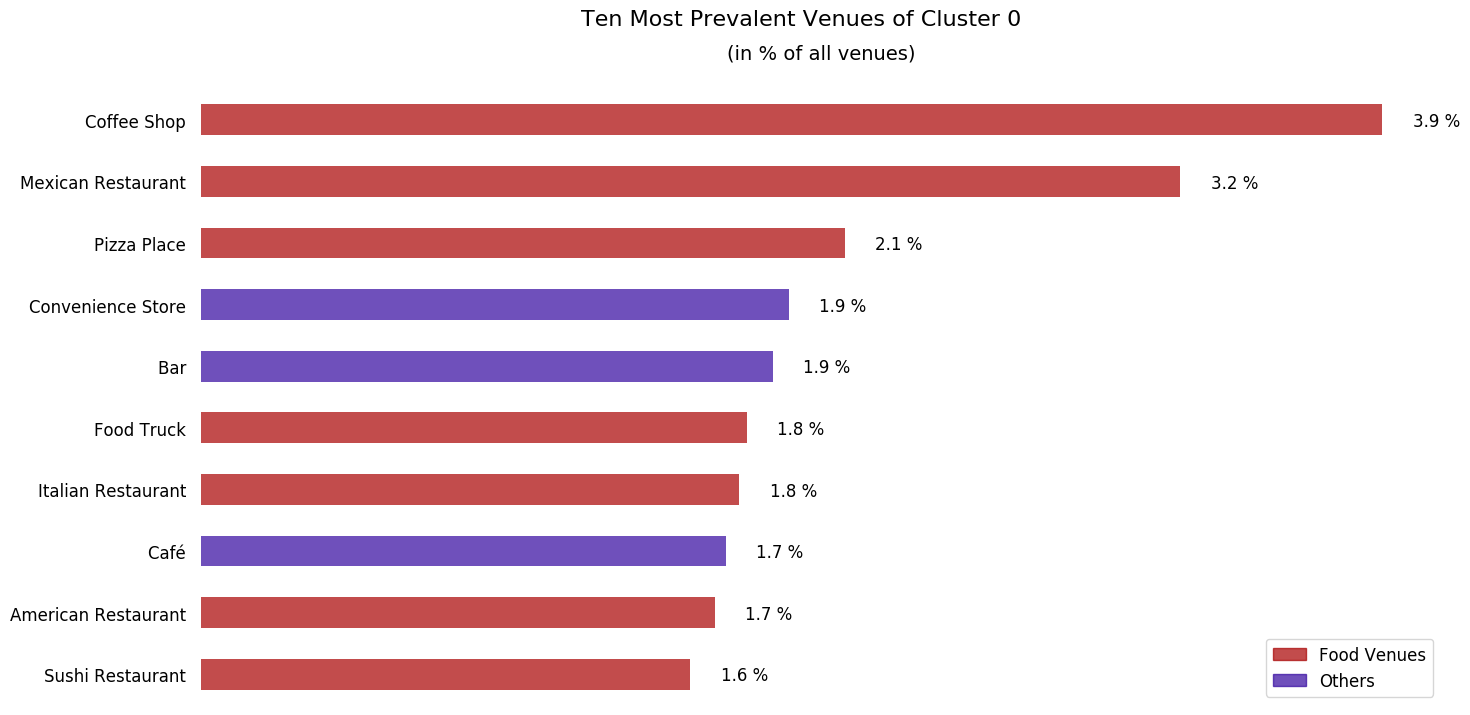

In [92]:
cluster0=pd.DataFrame(la_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)

There are 6 food venues in the top 10 venues of Cluster 0 with Mexican Restaurants making up nearly 20% of all venues. These facts indicate that Cluster 0 would not be the best one to explore further in terms of setting up a new restaurant.


#### *Cluster 1*

Korean Restaurant      Café  Thrift / Vintage Store  \
Cluster 1           0.273626  0.081868                0.071429   

           Japanese Restaurant  Grocery Store  Pizza Place  \
Cluster 1             0.058791       0.043407     0.035714   

           Mexican Restaurant  Fast Food Restaurant  Discount Store  \
Cluster 1            0.035714              0.035714        0.035714   

           Gas Station  Ice Cream Shop  Burger Joint  Restaurant  \
Cluster 1     0.035714        0.023077      0.015385    0.015385   

           Brazilian Restaurant    Bakery     Hotel  Bubble Tea Shop  \
Cluster 1              0.015385  0.015385  0.015385         0.015385   

           Dessert Shop  Coffee Shop  BBQ Joint  Sushi Restaurant  \
Cluster 1      0.015385     0.015385   0.015385          0.007692   

           Shopping Mall  Shabu-Shabu Restaurant  Speakeasy  \
Cluster 1       0.007692                0.007692   0.007692   

           Convenience Store  Clothing Store  Movie Theater  Concert Hall  \
Cluster 1           0.007692        0.007692       0.007692      0.007692   

           New American Restaurant  Beer Bar  Ramen Restaurant  Karaoke Bar  \
Cluster 1                 0.007692  0.007692          0.007692     0.007692   

               Pool  Hookah Bar  Juice Bar       Bar  Hotel Bar  \
Cluster 1  0.007692    0.007692   0.007692  0.007692   0.007692   

           Outdoor Sculpture  Paper / Office Supplies Store  Recording Studio  \
Cluster 1                0.0                            0.0               0.0   

           Record Shop  Park  Performing Arts Venue  Pet Store  Pharmacy  \
Cluster 1          0.0   0.0                    0.0        0.0       0.0   

           Poke Place  Public Art  Plaza  Pub  Print Shop  Pop-Up Shop  \
Cluster 1         0.0         0.0    0.0  0.0         0.0          0.0   

           Piano Bar  Pool Hall  Pie Shop  Playground  Other Repair Shop  \
Cluster 1        0.0        0.0       0.0         0.0                0.0   

           Photography Studio  ATM  Other Great Outdoors  Market  \
Cluster 1                 0.0  0.0                   0.0     0.0   

           Miscellaneous Shop  Middle Eastern Restaurant  Men's Store  \
Cluster 1                 0.0                        0.0          0.0   

           Mediterranean Restaurant  Massage Studio  Martial Arts Dojo  \
Cluster 1                       0.0             0.0                0.0   

           Marijuana Dispensary  Organic Grocery  Lounge  Locksmith  \
Cluster 1                   0.0              0.0     0.0        0.0   

           Liquor Store  Lingerie Store  Light Rail Station  Library  \
Cluster 1           0.0             0.0                 0.0      0.0   

           Mobile Phone Shop  Monument / Landmark  Moroccan Restaurant  Motel  \
Cluster 1                0.0                  0.0                  0.0    0.0   

           Multiplex  Museum  Music Store  Music Venue  Nail Salon  \
Cluster 1        0.0     0.0          0.0          0.0         0.0   

           Neighborhood  Rental Car Location  Nightclub  Noodle House  \
Cluster 1           0.0                  0.0        0.0           0.0   

           North Indian Restaurant  Office  Opera House  Optical Shop  \
Cluster 1                      0.0     0.0          0.0           0.0   

           Recreation Center  Satay Restaurant  Rental Service  \
Cluster 1                0.0               0.0             0.0   

           Residential Building (Apartment / Condo)  Trail  Toy / Game Store  \
Cluster 1                                       0.0    0.0               0.0   

           Tiki Bar  Theme Park  Theater  Thai Restaurant  Tex-Mex Restaurant  \
Cluster 1       0.0         0.0      0.0              0.0                 0.0   

           Tea Room  Tattoo Parlor  Tanning Salon  Taiwanese Restaurant  \
Cluster 1       0.0            0.0            0.0                   0.0   

           Tailor Shop  Taco Place  Szechuan Restaurant  Supplement 

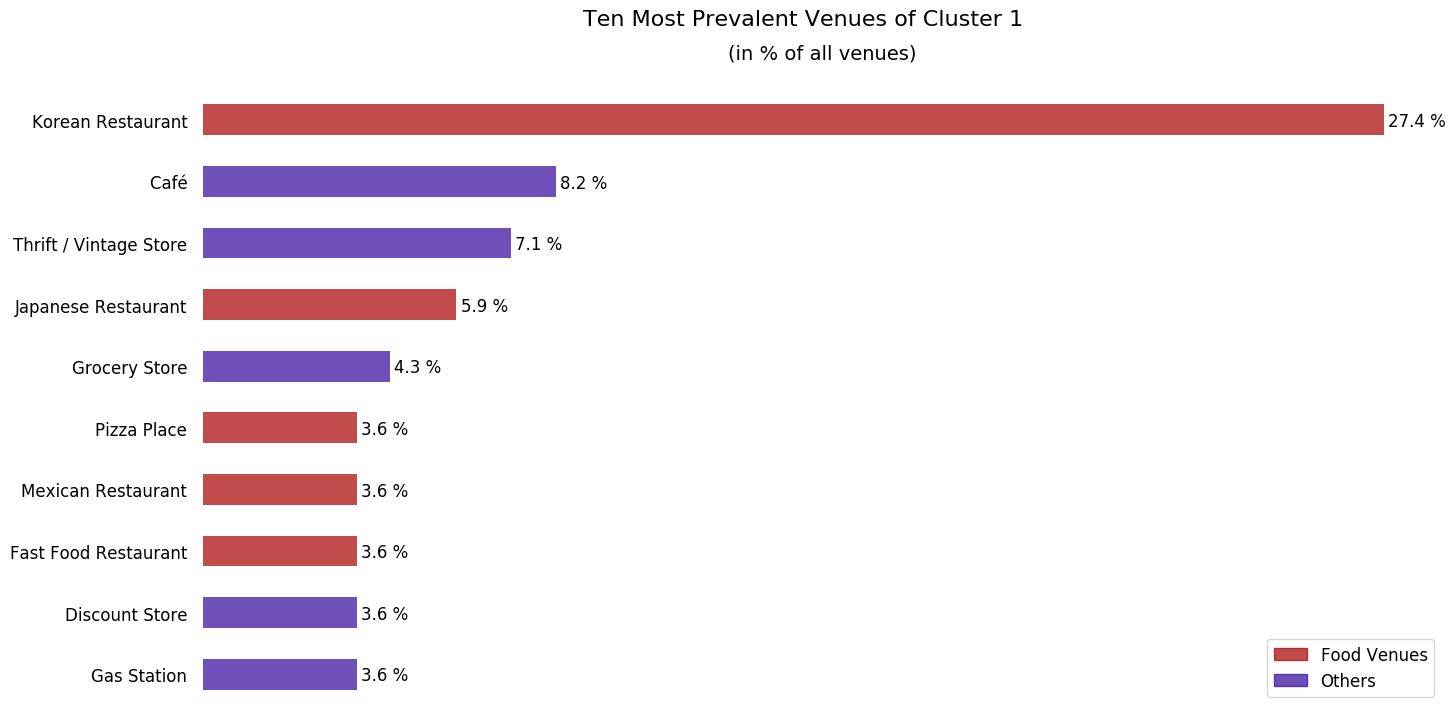

In [93]:
cluster1=pd.DataFrame(la_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

There are 4 food venues in the top 10 venues of Cluster 1 with Korean Restaurants making up a huge majority (nearly 30%) of all venues. This is unsurprising as Cluster 1 consists of only two neighbourhoods, one being Koreatown and the other (Mid-Wilshire) also having a lot of Korean Restaurants. While there are only 4 food venues in the top 10, the complete dominance of Korean Restaurants in the area indicates the fact that Cluster 1 need not be looked into any further.

#### *Cluster 2*

Thai Restaurant  Massage Studio      Café  \
Cluster 2         0.363636        0.055944  0.055944   

           Middle Eastern Restaurant  Juice Bar  Strip Club  Pet Store  \
Cluster 2                   0.043124   0.040793    0.027972   0.027972   

           Marijuana Dispensary  Dessert Shop  Sushi Restaurant  Comedy Club  \
Cluster 2              0.027972      0.027972          0.027972     0.027972   

           Discount Store       Bar  Fast Food Restaurant  Sandwich Place  \
Cluster 2        0.027972  0.027972              0.027972        0.025641   

           Mexican Restaurant  Convenience Store  Cocktail Bar  \
Cluster 2            0.015152           0.015152      0.015152   

           Gym / Fitness Center  Ice Cream Shop  Supplement Shop  \
Cluster 2              0.015152        0.012821         0.012821   

           Liquor Store  Department Store      Bank  \
Cluster 2      0.012821          0.012821  0.012821   

           Vegetarian / Vegan Restaurant  Yoga Studio  Wine Bar  \
Cluster 2                       0.012821     0.012821  0.012821   

           Performing Arts Venue  Paper / Office Supplies Store  \
Cluster 2                    0.0                            0.0   

           Outdoor Sculpture  Other Repair Shop  Other Great Outdoors  \
Cluster 2                0.0                0.0                   0.0   

           Organic Grocery  Optical Shop  Opera House  Office  \
Cluster 2              0.0           0.0          0.0     0.0   

           North Indian Restaurant  Noodle House  Nightclub  \
Cluster 2                      0.0           0.0        0.0   

           New American Restaurant  Park  Pharmacy  Vietnamese Restaurant  \
Cluster 2                      0.0   0.0       0.0                    0.0   

           Nail Salon  Photography Studio  Piano Bar  Pie Shop  Pizza Place  \
Cluster 2         0.0                 0.0        0.0       0.0          0.0   

           Playground  Plaza  Video Store  Poke Place  Pool  Pool Hall  \
Cluster 2         0.0    0.0          0.0         0.0   0.0        0.0   

           Pop-Up Shop  Print Shop  Pub  Neighborhood  Music Venue  \
Cluster 2          0.0         0.0  0.0           0.0          0.0   

           Ramen Restaurant  Music Store  Karaoke Bar  Kids Store  \
Cluster 2               0.0          0.0          0.0         0.0   

           Korean Restaurant  Latin American Restaurant  Laundromat  \
Cluster 2                0.0                        0.0         0.0   

           Laundry Service  Lawyer  Library  Light Rail Station  \
Cluster 2              0.0     0.0      0.0                 0.0   

           Lingerie Store  Women's Store  Locksmith  Lounge  Wings Joint  \
Cluster 2             0.0            0.0        0.0     0.0          0.0   

           Market  Martial Arts Dojo  Wine Shop  Mediterranean Restaurant  \
Cluster 2     0.0                0.0        0.0                       0.0   

           Men's Store  Whisky Bar  Miscellaneous Shop  Mobile Phone Shop  \
Cluster 2          0.0         0.0                 0.0                0.0   

           Monument / Landmark  Waterfront  Moroccan Restaurant  Motel  \
Cluster 2                  0.0         0.0                  0.0    0.0   

           Movie Theater  Multiplex  Museum  Public Art  Record Shop  \
Cluster 2            0.0        0.0     0.0         0.0          0.0   

           Tiki Bar  Train Station  Soccer Stadium  Social Club  \
Cluster 2       0.0            0.0             0.0          0.0   

           South American Restaurant  Transportation Service  \
Cluster 2                        0.0                     0.0   

           Southern / Soul Food Restaurant  Spa  Spanish Restaurant  \
Cluster 2                              0.0  0.0                 0.0   

           Speakeasy  Sporting Goods Shop  Sports Bar  Stadium  \
Cluster 2        0.0                  0.0         0.0      0.0   

           State / Provincial Park  Stationery Store  Steak

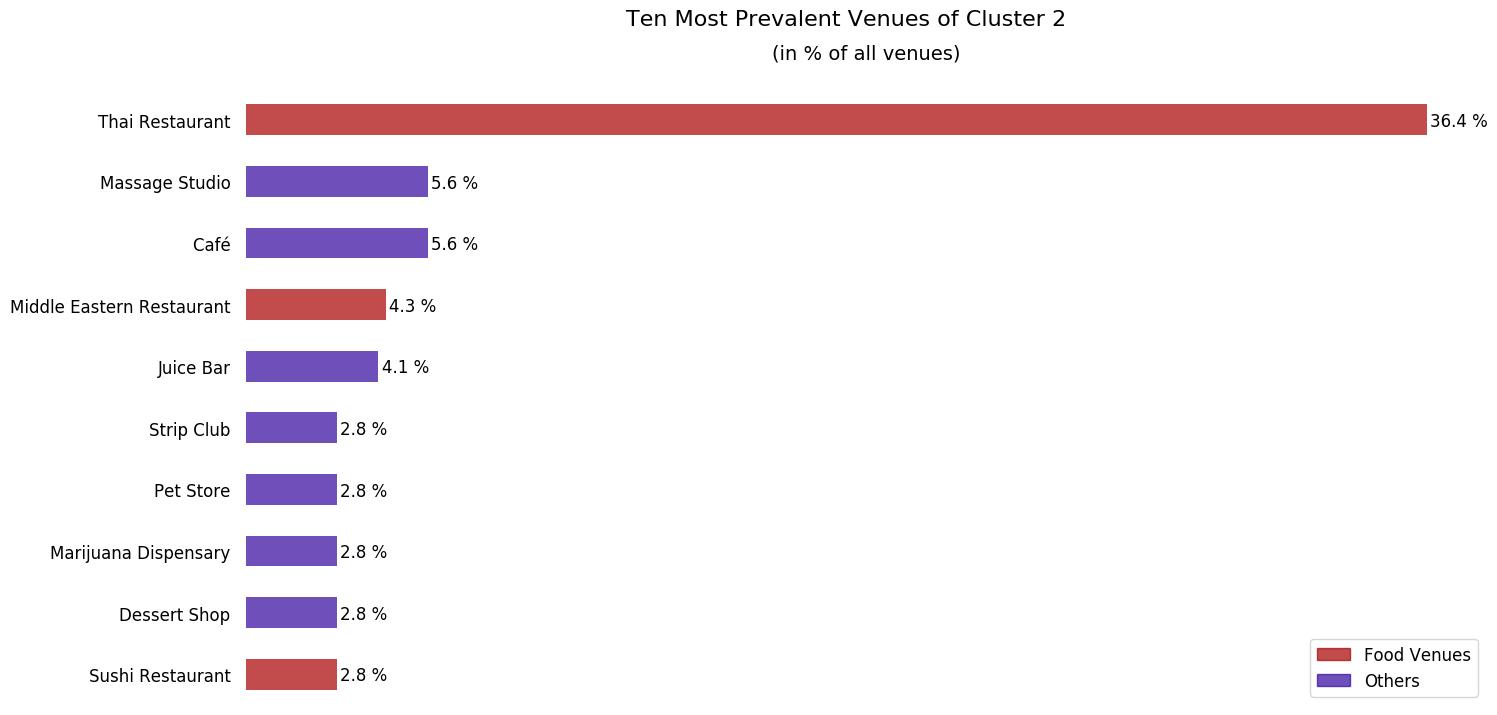

In [94]:
cluster2=pd.DataFrame(la_results.iloc[2,0:-1]).transpose()
cluster2.sort_values(by='Cluster 2',axis=1,ascending=False,inplace=True)
cluster2.rename(columns={'Residential Building (Apartment / Condo)': 'Apartment / Condo'},inplace=True)
display(cluster2)

clus2=cluster2.iloc[0,9::-1]
generate_plot(clus2,2)

There are only 2 food venues in the top 10 venues of Cluster 2. To add to that, the two venues are Food Trucks and Coffee Shops as opposed to proper restaurants. There are a lot of public venues in this cluster - venues that see a lot of footfall such as parks, museums, gyms and department stores. The presence of condominium complexes in this list also suggest that the population per square unit of these neighbourhoods is high. All of these observations point in the direction of Cluster 2 being nominated as the cluster to explore further.

Having said that, the decision to explore Cluster 2 can only be confirmed after examining Cluster 3: -

#### *Cluster 3*

Fast Food Restaurant  Sandwich Place  Pizza Place  \
Cluster 3              0.068049        0.057601     0.046747   

           Mexican Restaurant  Pharmacy      Bank  Grocery Store  \
Cluster 3            0.043363   0.03854  0.032859        0.02731   

           Burger Joint  Donut Shop  Mobile Phone Shop  Fried Chicken Joint  \
Cluster 3      0.026697    0.026237           0.026219             0.023258   

           Video Store  Clothing Store  Convenience Store     Café  \
Cluster 3     0.023078        0.017907           0.016732  0.01657   

           Coffee Shop  Chinese Restaurant  Shipping Store      Park  \
Cluster 3     0.016369            0.015847        0.014739  0.014636   

           Ice Cream Shop  American Restaurant  Intersection  Liquor Store  \
Cluster 3        0.014319             0.014195      0.013173      0.012925   

           Restaurant  Discount Store  Sushi Restaurant  Shoe Store    Bakery  \
Cluster 3    0.012684        0.011839          0.010506    0.010503  0.010202   

           Supermarket  Pet Store     Hotel  Filipino Restaurant  \
Cluster 3     0.009998   0.009823  0.008761             0.008742   

           Furniture / Home Store       ATM  Breakfast Spot  \
Cluster 3                0.008398  0.008357        0.007955   

           Gym / Fitness Center  Asian Restaurant  Gas Station  \
Cluster 3              0.007937          0.007607     0.007607   

           Paper / Office Supplies Store  Southern / Soul Food Restaurant  \
Cluster 3                       0.007313                         0.007198   

               Bar  Cosmetics Shop  Automotive Shop  Music Venue  \
Cluster 3  0.00715        0.006687         0.006667     0.006576   

           Department Store  Frozen Yogurt Shop     Diner  \
Cluster 3          0.006187            0.005861  0.005681   

           Latin American Restaurant  South American Restaurant   Theater  \
Cluster 3                   0.005568                   0.005568  0.005043   

           Japanese Restaurant  Hardware Store  Airport Terminal  \
Cluster 3             0.005043        0.005019          0.005013   

           Italian Restaurant  Laundromat  Home Service  Flower Shop  \
Cluster 3             0.00481    0.004762      0.004762     0.004762   

           Sculpture Garden  Women's Store  Seafood Restaurant  Hot Dog Joint  \
Cluster 3          0.004762       0.004762            0.004365       0.004172   

           Lingerie Store  Bookstore  BBQ Joint  Taco Place  Thai Restaurant  \
Cluster 3        0.003968   0.003855   0.003752    0.003487         0.003401   

           Bed & Breakfast      Pool  Other Great Outdoors  Wings Joint  \
Cluster 3         0.003401  0.003401              0.003401     0.003355   

           New American Restaurant  Food Truck  Video Game Store  \
Cluster 3                 0.003355    0.003175          0.002778   

           Shopping Mall  Supplement Shop  Light Rail Station  \
Cluster 3       0.002778         0.002778            0.002646   

           Fruit & Vegetable Store  Playground    Tunnel  Tailor Shop  \
Cluster 3                 0.002646    0.002646  0.002506     0.002506   

           Print Shop  Karaoke Bar  Noodle House       Spa  Big Box Store  \
Cluster 3    0.002268     0.002268      0.002268  0.002268       0.002268   

           Greek Restaurant  Salon / Barbershop  Auto Workshop  \
Cluster 3          0.002268            0.002268       0.002268   

           Korean Restaurant     Motel  Historic Site  Burrito Place  \
Cluster 3           0.002268  0.002165       0.002165       0.002165   

           Smoothie Shop  Men's Store  Scenic Lookout  Poke Place  Locksmith  \
Cluster 3       0.002165     0.002165        0.002165    0.002165   0.002165   

           Ethiopian Restaurant  Thrift / Vintage Store       Gym  \
Cluster 3              0.002165                0.001905  0.001587   

           Deli / Bodega  Art Gallery  Caribbean Restaurant  \
Cluster 3       0.001587     0.001587        

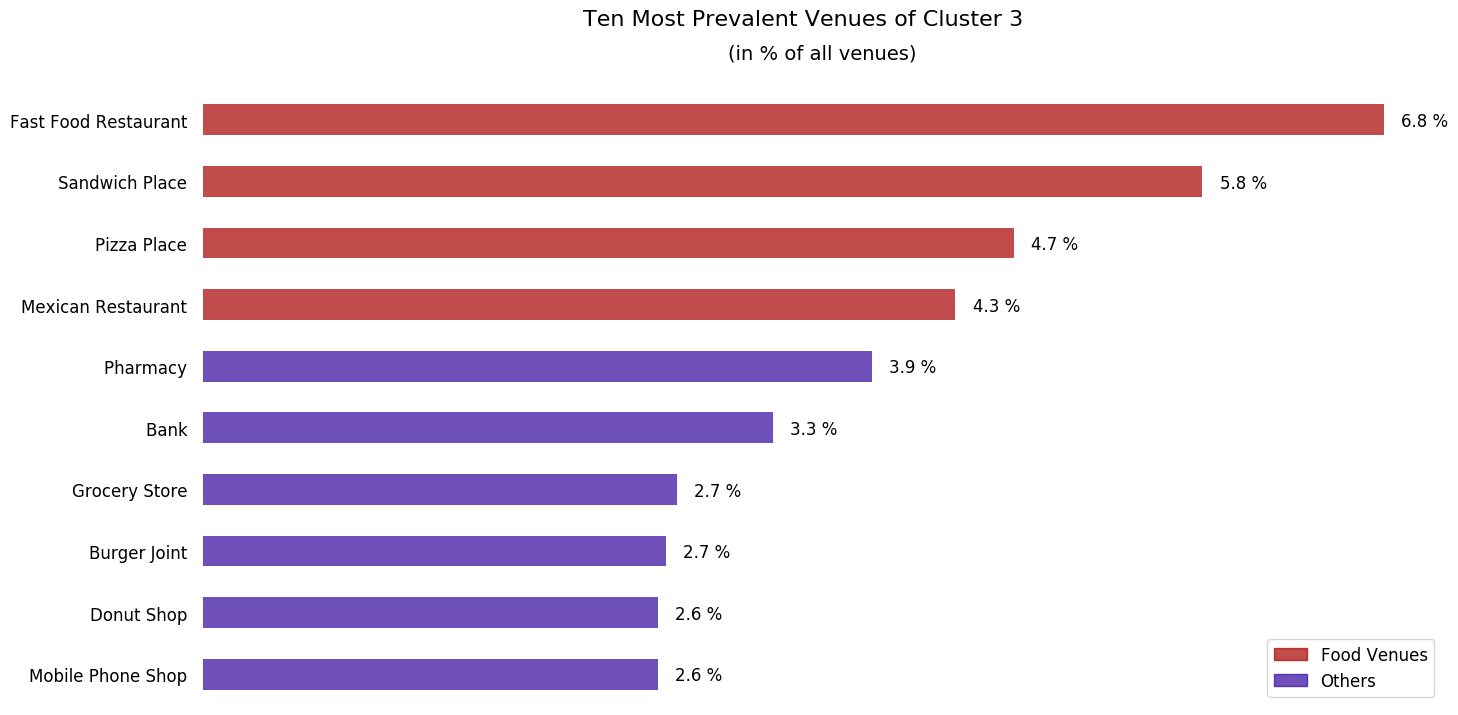

In [95]:
cluster3=pd.DataFrame(la_results.iloc[3,0:-1]).transpose()
cluster3.sort_values(by='Cluster 3',axis=1,ascending=False,inplace=True)
display(cluster3)

clus3=cluster3.iloc[0,9::-1]
generate_plot(clus3,3)

There are 8 food venues in the top 10 venues of Cluster 1 which is huge percentage. Except for the number 1 venue (Coffee Shops), all other food venues are proper restaurants. This clearly indicates that the neighbourhoods in Cluster 3 are saturated with restaurants already and need not be considered when opening a new restaurant.

It is now safe to confirm the decision of investigating **Cluster 2** further and eliminating all other clusters.

In [119]:
clus1neigh=la_merged.loc[la_merged['Cluster Label'] == 1, la_merged.columns[0]].values.tolist()
clus1neigh

['Harvard Heights', 'Koreatown']

In [120]:
filtered_nhoods=nhoods.copy()

for i in range(0,len(filtered_nhoods)):

    if filtered_nhoods.iloc[i,0] not in clus1neigh:
        filtered_nhoods.iloc[i,0]='TO DROP'

In [121]:
filtered_nhoods=filtered_nhoods[filtered_nhoods.Neighbourhood!='TO DROP']
filtered_nhoods.reset_index(drop=True,inplace=True)

The neighbourhoods in Cluster 2 along with their coordinates: -

In [122]:
filtered_nhoods

Neighbourhood   Latitude   Longitude
0  Harvard Heights  34.047111 -118.305483
1        Koreatown  34.061734 -118.305373

Function to obtain and display the closest Italian restaurants from each neighbourhood in Cluster 2 and the corresponding distances: -

In [123]:
def get_neighbourhood_MiddleEastern_Restaurant(url1):
    
    results = requests.get(url1).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a data frame
    dataframe = json_normalize(venues)

    #print('DataFrame',dataframe)
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    #print('Filtered columns',filtered_columns)
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    display(dataframe_filtered.loc[:,['name','categories','distance','lat','lng']])

In [124]:
category='4bf58dd8d48988d10e941735'#The category for Halal restaurants obtained from https://developer.foursquare.com/docs/resources/categories
radius = 700
LIMIT=30

In [125]:
for n in range(0,len(filtered_nhoods)):
    url = 'http://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    filtered_nhoods.iloc[n,1], 
    filtered_nhoods.iloc[n,2], 
    VERSION, 
    category, 
    radius, 
    LIMIT)
    print('------------------------------------------------- '+ filtered_nhoods.iloc[n,0] + ' -------------------------------------------------')
    get_neighbourhood_MiddleEastern_Restaurant(url)
    print('\n\n')

------------------------------------------------- Harvard Heights -------------------------------------------------


name        categories  distance  \
0  Papa Cristo's Catering & Greek Taverna  Greek Restaurant       538   
1         Ali Ranas Baklava and Gyro cart  Greek Restaurant       310   
2       Hidden LA's Big Fat Greek Tuesday  Greek Restaurant       530   

         lat         lng  
0  34.047377 -118.299649  
1  34.049600 -118.307000  
2  34.047355 -118.299735




------------------------------------------------- Koreatown -------------------------------------------------


name        categories  distance        lat         lng
0  Sizzling Kabob  Greek Restaurant       434  34.061834 -118.300668

In [126]:
filter2_nhoods=filtered_nhoods[(filtered_nhoods.Neighbourhood !='Park La Brea') & (filtered_nhoods.Neighbourhood !='Hancock Park')]
filter2_nhoods.reset_index(drop=True,inplace=True)
filter2_nhoods

Neighbourhood   Latitude   Longitude
0  Harvard Heights  34.047111 -118.305483
1        Koreatown  34.061734 -118.305373

Computing the distance of each neighbourhood from the center of LA and adding it as a column to the existing data frame: -

In [127]:
filter2_nhoods = filter2_nhoods.reindex( columns = filter2_nhoods.columns.tolist() + ['Distance from LA center (in km)'])  #this way to avoid warnings

In [128]:
from math import radians, sin, cos, acos

slat = radians(34.0536909) #LA center Latitude obtained earlier
slon = radians(-118.2427666) #LA center Longitude obtained earlier

In [129]:
for n in range(0,len(filter2_nhoods)):
    
    elat = radians(filter2_nhoods.iloc[n,1])
    elon = radians(filter2_nhoods.iloc[n,2])

    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    filter2_nhoods.loc[n,'Distance from LA center (in km)']=dist

In [130]:
filter2_nhoods.sort_values(by='Distance from LA center (in km)',inplace=True)
filter2_nhoods.reset_index(drop=True,inplace=True)
filter2_nhoods

Neighbourhood   Latitude   Longitude  Distance from LA center (in km)
0  Harvard Heights  34.047111 -118.305483                         5.824201
1        Koreatown  34.061734 -118.305373                         5.836395

### Web Scraping Rent Data  <a name="rent"></a>

The list of average rent of all neighbourhoods in LA can be obtained by scraping the relevant webpage. The data in the webpage is in the form of a table. Therefore, the data can be obtained much more easily.

In [131]:
url = requests.get('https://www.rentcafe.com/average-rent-market-trends/us/ca/los-angeles/').text
soup = BeautifulSoup(url,"html.parser")

In [132]:
table = soup.find('table',id="MarketTrendsAverageRentTable")
pr = table.find_all('td')
nh = table.find_all('th')

In [133]:
price = []
neighbourhood = []

for i in range(0, len(pr)):
    price.append(pr[i].text.strip())
    neighbourhood.append(nh[i+2].text.strip())
        
df_rent = pd.DataFrame(data=[neighbourhood, price]).transpose()
df_rent.columns = ['Neighbourhood', nh[1].text]
df_rent.loc[32,'Neighbourhood']='Montecito Heights' #Correcting a spelling error
df_rent

Neighbourhood Average Rent
0              Jefferson Park       $1,311
1               Vermont Vista       $1,426
2              Vermont Knolls       $1,426
3               Glassell Park       $1,448
4                   El Sereno       $1,448
5                Cypress Park       $1,448
6                    Winnetka       $1,504
7                   Hyde Park       $1,510
8               Panorama City       $1,569
9                Leimert Park       $1,570
10                North Hills       $1,570
11          Arlington Heights       $1,584
12                 Sun Valley       $1,586
13            Harvard Heights       $1,610
14                    Pacoima       $1,615
15                     Arleta       $1,620
16               Shadow Hills       $1,623
17          Vermont - Slauson       $1,629
18              Mission Hills       $1,662
19                     Reseda       $1,675
20           Mount Washington       $1,701
21                    Tarzana       $1,725
22                   Van Nuys       $1,727
23                    Sunland       $1,746
24           Montecio Heights       $1,767
25   Baldwin Hills - Crenshaw       $1,769
26                Lake Balboa       $1,787
27          Lake View Terrace       $1,794
28                 West Hills       $1,795
29                     Sylmar       $1,801
30                Valley Glen       $1,811
31              Boyle Heights       $1,816
32          Montecito Heights       $1,820
33          Manchester Square       $1,841
34               Harvard Park       $1,841
35              Gramercy Park       $1,841
36        Chesterfield Square       $1,841
37             Vermont Square       $1,877
38                 South Park       $1,877
39              Granada Hills       $1,881
40                 Northridge       $1,882
41              Highland Park       $1,903
42                 Eagle Rock       $1,908
43            Lincoln Heights       $1,918
44                Canoga Park       $1,928
45                 Chatsworth       $1,941
46                  Koreatown       $1,973
47                     Encino       $1,999
48             Windsor Square       $2,028
49               Porter Ranch       $2,031
50            North Hollywood       $2,062
51                  Los Feliz       $2,068
52             East Hollywood       $2,073
53               Sherman Oaks       $2,079
54                   Westlake       $2,099
55                Silver Lake       $2,110
56             Elysian Valley       $2,116
57                  Larchmont       $2,136
58            Atwater Village       $2,182
59                   Mid-City       $2,191
60                  Echo Park       $2,209
61              Griffith Park       $2,215
62           Pico - Robertson       $2,227
63             Woodland Hills       $2,334
64                Studio City       $2,375
65               Sunkist Park       $2,401
66             Studio Village       $2,401
67                  Park West       $2,401
68                  Fox Hills       $2,401
69      Blanco - Culver Crest       $2,401
70                Beverlywood       $2,416
71                      Palms       $2,425
72             Valley Village       $2,427
73                Toluka Lake       $2,440
74            Hollywood Hills       $2,459
75                  Hollywood       $2,498
76               Elysian Park       $2,509
77               Hancock Park       $2,550
78       Hollywood Hills West       $2,551
79                Rancho Park       $2,561
80              Cheviot Hills       $2,561
81                  Chinatown       $2,569
82                 McLaughlin       $2,670
83       Downtown Los Angeles       $2,686
84               Mid-Wilshire       $2,710
85                Westchester       $2,728
86                  Park East       $2,766
87                  Jefferson       $2,766
88                  Clarkdale       $2,766
89                Blair Hills       $2,766
90                  Mar Vista       $2,781
91           West Los Angeles       $2,785
92               

The above data frame is already in ascending order of average rent.

In [134]:
df_rent[(df_rent['Neighbourhood']=='Harvard Heights') | (df_rent['Neighbourhood']=='Korea Town')]

Neighbourhood Average Rent
13  Harvard Heights       $1,610

The average rent in **Harvard Heights** is $1610 which is comparatively much cheapear in the list. It is is also close to the center of Los Angeles